#Moduel 03: Scaling, Encoding, and Distances


##Standardization (Z-Score Scaling)

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.DataFrame({'h':[150,160,170,185,190],
                   'w':[50,58,70,80,90]})
df

,h,w
0,150,50
1,160,58
2,170,70
3,185,80
4,190,90


In [12]:
m=df.mean()
# print(m)
s=df.std()
print(s)
z = (df-m)/s
z.round(2)

h    16.733201
w    16.149303
dtype: float64


,h,w
0,-1.25,-1.21
1,-0.66,-0.72
2,-0.06,0.02
3,0.84,0.64
4,1.14,1.26


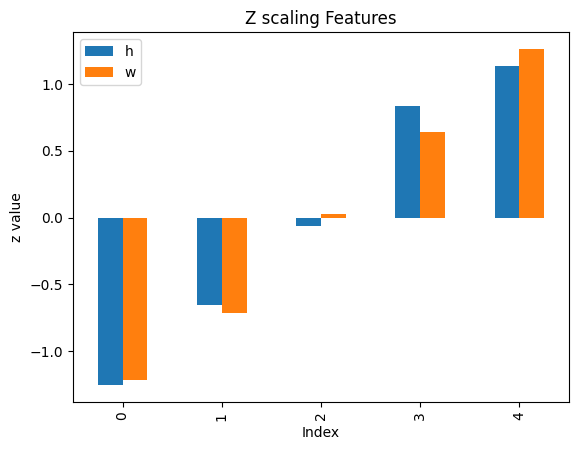

In [13]:
z.plot(kind='bar')
plt.title("Z scaling Features")
plt.xlabel("Index"); plt.ylabel('z value')
plt.show()

##Min–Max Scaling (Rescaling to [0,1])

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'h':[150,175,170,180,190],
                   'w':[50,60,70,180,90]})
df

,h,w
0,150,50
1,175,60
2,170,70
3,180,180
4,190,90


In [15]:
#Step-1: Min, Max, Range
mn = df.min()
mx = df.max()
rg = mx - mn
mn,mx,rg

(h    150
 w     50
 dtype: int64,
 h    190
 w    180
 dtype: int64,
 h     40
 w    130
 dtype: int64)

In [16]:
#Step-2: Shift to zero
ss = df - mn
ss.head()

,h,w
0,0,0
1,25,10
2,20,20
3,30,130
4,40,40


In [17]:
#Step-3: Divide by range
mm = ss/rg
mm.round(2)

,h,w
0,0.00,0.00
1,0.62,0.08
2,0.50,0.15
3,0.75,1.00
4,1.00,0.31


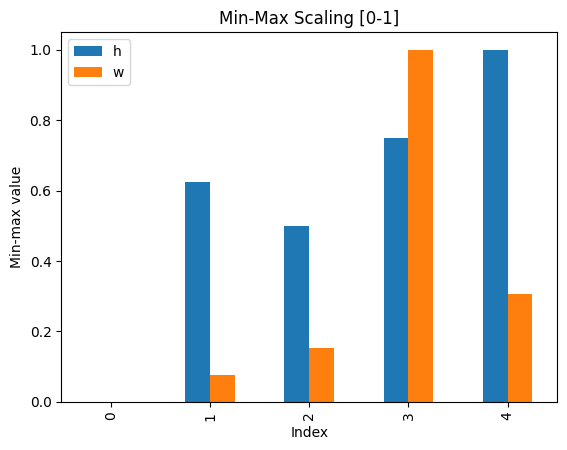

In [18]:
#Plot
mm.plot(kind='bar')
plt.title("Min-Max Scaling [0-1]")
plt.xlabel("Index"); plt.ylabel('Min-max value')
plt.show()

##Robust Scaling (Outlier-Resistant)

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'h':[150,160,170,180,300],
                   'w':[50,60,70,80,200]})
df

,h,w
0,150,50
1,160,60
2,170,70
3,180,80
4,300,200


In [20]:
# step 1: median, quartiles, IQR
md = df.median()
q1 = df.quantile(.25)
q3 = df.quantile(.75)
iqr = q3-q1
md,q1,q3,iqr

(h    170.0
 w     70.0
 dtype: float64,
 h    160.0
 w     60.0
 Name: 0.25, dtype: float64,
 h    180.0
 w     80.0
 Name: 0.75, dtype: float64,
 h    20.0
 w    20.0
 dtype: float64)

In [21]:
# step 2: center by median
ct = df - md
ct

,h,w
0,-20.0,-20.0
1,-10.0,-10.0
2,0.0,0.0
3,10.0,10.0
4,130.0,130.0


In [22]:
# step 3: divide by IQR
rb = ct/iqr
rb.round(2)

,h,w
0,-1.0,-1.0
1,-0.5,-0.5
2,0.0,0.0
3,0.5,0.5
4,6.5,6.5


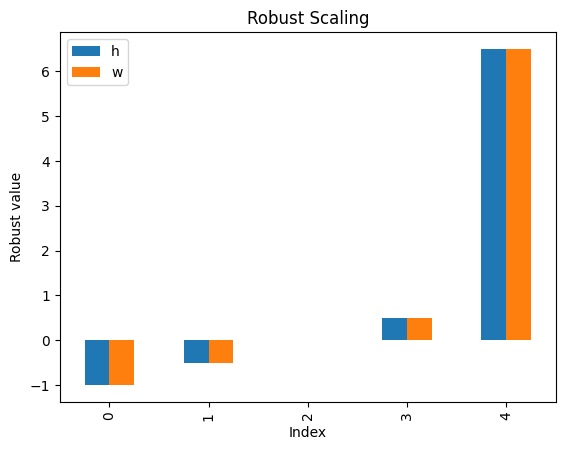

In [23]:
# visualize robust scaled values
rb.plot(kind='bar')
plt.title("Robust Scaling")
plt.xlabel("Index"); plt.ylabel('Robust value')
plt.show()

In [24]:
# standardization/z score
m = df.mean()
s = df.std()
z = (df - m) / s

# min max
mn = df.min()
mx = df.max()
mm = (df - mn) / (mx - mn)

# side-by-side
out = pd.concat([df,
                 z.add_prefix('z_'),
                 mm.add_prefix('mm_'),
                 rb.add_prefix('rb_')], axis=1)
out.round(2)

,h,w,z_h,z_w,mm_h,mm_w,rb_h,rb_w
0,150,50,-0.68,-0.68,0.00,0.00,-1.0,-1.0
1,160,60,-0.52,-0.52,0.07,0.07,-0.5,-0.5
2,170,70,-0.36,-0.36,0.13,0.13,0.0,0.0
3,180,80,-0.20,-0.20,0.20,0.20,0.5,0.5
4,300,200,1.76,1.76,1.00,1.00,6.5,6.5


##One-Hot Encoding

In [25]:
import pandas as pd

df = pd.DataFrame({
    "id":[1,2,3,4],
    "color":["red","blue","green","red"],
    "size":["Small","Medium","Large","Medium"],
    "price":[10,12,15,11]
})

In [44]:
# Step 2: Apply one-hot encoding to the 'color' column
d_color = pd.get_dummies(df["color"], prefix="C", dtype = int)
d_color

,C_blue,C_green,C_red
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1


In [42]:
# Step 3: Combine the new columns back with the original data
df_encoded = pd.concat([df,d_color], axis = 1)


In [28]:
# Step 4: Drop the old 'color' column if you no longer need it
df_encoded = df_encoded.drop("color", axis = 1)
print(df_encoded)

   id    size  price  C_blue  C_green  C_red
0   1   Small     10       0        0      1
1   2  Medium     12       1        0      0
2   3   Large     15       0        1      0
3   4  Medium     11       0        0      1


##Ordinal Encoding (for ordered categories)

In [29]:
import pandas as pd

df = pd.DataFrame({
    "id":[1,2,3,4],
    "color":["red","blue","green","red"],
    "size":["Small","Medium","Large","Medium"],
    "price":[10,12,15,11]
})
df

,id,color,size,price
0,1,red,Small,10
1,2,blue,Medium,12
2,3,green,Large,15
3,4,red,Medium,11


In [30]:
# Step 2: declare the ordinal order
order = {"Small":1,"Medium":2,"Large":3}

In [31]:
# Step 3: convert the whole feature
# df["size_encoded"]=df["size"].map(order).astype(int)
df["size"]=df["size"].map(order).astype(int)

In [32]:
df

,id,color,size,price
0,1,red,1,10
1,2,blue,2,12
2,3,green,3,15
3,4,red,2,11


##Understanding Vectors, Dot Product, and Norms — A Hands-on Python Exploration

In [33]:
#Step 1: Creating Vectors
import numpy as np

# Two tiny 3D vectors
a = np.array([2, 1, 3])
b = np.array([1, 3, 3])
print(a)
print(b)

[2 1 3]
[1 3 3]


In [34]:
#Step 2: Vector Operations (Addition and Subtraction)
add_ab = a + b
sub_ab = a - b
print(add_ab)
print(sub_ab)

[3 4 6]
[ 1 -2  0]


In [35]:
#Step 3: Dot Product (Similarity of Direction)
# Manual dot product: sum of pairwise products
dot = a[0]*b[0] + a[1]*b[1] + a[2]*b[2]

dot_np = a@b # np.dot(a,b)
print(dot)
print(dot_np)

14
14


In [36]:
#Step 4: Norms (Length or Magnitude of a Vector)
# L2 norm, the usual length
l2_a = np.linalg.norm(a)
print(l2_a)
l1_a = np.linalg.norm(a, ord = 1)
print(l1_a)

3.7416573867739413
6.0


In [37]:
#Step 5: Normalizing a Vector (Unit Vector)
unit_a = a/np.linalg.norm(a)
len_unit_a = np.linalg.norm(unit_a)
print(unit_a)
print(len_unit_a)

[0.53452248 0.26726124 0.80178373]
1.0


## Euclidean and Manhattan Distance

In [38]:
import numpy as np

X = np.array([
    [70, 80],  # S1
    [60, 90],  # S2
    [85, 60],  # S3
    [78, 76],  # S4
    [62, 65],  # S5
], dtype=float)

q = np.array([75, 70], dtype=float)

print("X shape:", X.shape)
print("q:", q.tolist())

X shape: (5, 2)
q: [75.0, 70.0]


In [39]:
# Euclidean distances (L2)
eu = np.linalg.norm(X - q, axis=1)
print("Euclidean:", np.round(eu, 3).tolist())

Euclidean: [11.18, 25.0, 14.142, 6.708, 13.928]


In [40]:
# Manhattan distances (L1)
ma = np.linalg.norm(X - q, ord=1, axis=1)
print("Manhattan:", ma.tolist())

Manhattan: [15.0, 35.0, 20.0, 9.0, 18.0]
